### Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster

# PC1 Apply the PCA to the superhero-data
Hint: For a sample analysis in Python see https://www.reneshbedre.com/blog/principal-component-anahtml Look at the iris example in the lower part

(a) Calculate the PCA and give out the principal components. Should one normalize before? Show
the coeffients of the first principal component

(b) Assess the number of needed dimensions

(c) Interpretation of the transformation: show the biplot with labeled variable names and describe,
what you see there: what do the first 2 PC’s mean?


## a)

In [2]:
# loading the superhero dataset after adding name of variables in csv
superhero_df = pd.read_csv('superheros.csv', delimiter=',')
superhero_df.head()

,Height,Intelligence,Strength,Speed,Agility,FightingSkills,Health
0,180.0,7.0,29,7.0,17,79.0,140.0
1,168.0,4.0,26,4.0,14,81.0,100.0
2,186.0,4.0,29,6.0,16,86.0,140.0
3,173.0,4.0,15,6.0,16,80.0,100.0
4,188.0,3.0,26,4.0,16,80.0,80.0


In [3]:
def standarize_dataset(dataframe):
    scaler = StandardScaler()
    return scaler.fit_transform(dataframe)


def get_pca_out(dataframe, if_standarize=False, n_componenets=None):
    pca = PCA(n_components=n_componenets)

    # drop rows with missing values
    dataframe_copy = dataframe.copy()
    dataframe_copy.dropna(inplace=True)

    # standarize the data if needed
    if if_standarize:
        dataframe_copy = standarize_dataset(dataframe_copy)

    # calculate variance ratio
    pca_out = pca.fit(dataframe_copy)
    return pca_out


def get_explained_variance_ratio(pca_out):
    return pca_out.explained_variance_ratio_

def get_cumulative_proportion_of_variance(explained_variance_ratio):
    return np.cumsum(explained_variance_ratio)


def print_table_of_principal_components(dataframe, if_standarize=False):
    pca_out = get_pca_out(dataframe, if_standarize)

    # get the principal components
    principal_components = pca_out.components_
    num_pc = pca_out.n_components_
    # create a list of PC names
    pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

    # create a dataframe with the principal components
    loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, principal_components)))
    loadings_df['variable'] = dataframe.columns.values
    loadings_df = loadings_df.set_index('variable')

    return loadings_df


def plot_correlation_matrix_of_principal_components(table_of_principal_components):
    ax = sns.heatmap(table_of_principal_components, annot=True, cmap='Spectral')
    plt.show()


def get_coefficients_of_principal_components(pca_out):
    first_pc = pca_out['PC1']
    print("Coefficients of the first principal component:\n", first_pc)
    return first_pc



### Without standarization

In [4]:
# print the table of principal components
pca_table = print_table_of_principal_components(superhero_df)
print(pca_table)


                     PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                     
Height          0.082373  0.858897 -0.307023 -0.357737  0.168694  0.065400   
Intelligence   -0.007344  0.007219  0.011033  0.029078  0.045214 -0.325543   
Strength        0.084943  0.280479 -0.170793  0.924451  0.168401  0.038145   
Speed           0.027885 -0.092621  0.195543 -0.034300  0.370140  0.858440   
Agility         0.007864 -0.141785  0.106467 -0.089063  0.890611 -0.372771   
FightingSkills -0.006814 -0.382141 -0.908906 -0.071791  0.094514  0.106851   
Health          0.992502 -0.094134  0.027602 -0.048036 -0.044886 -0.031533   

                     PC7  
variable                  
Height          0.023157  
Intelligence    0.943877  
Strength       -0.022878  
Speed           0.278041  
Agility        -0.168586  
FightingSkills  0.048031  
Health          0.000874  


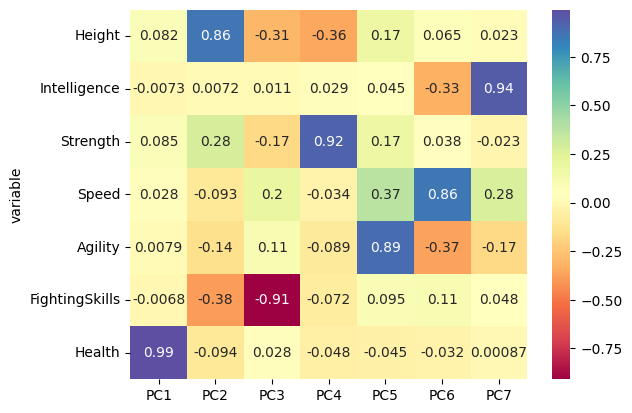

In [5]:
# plot the correlation matrix of the principal components
plot_correlation_matrix_of_principal_components(pca_table)

In [6]:
# get the coefficients of the principal components
fist_pc = get_coefficients_of_principal_components(pca_table)

Coefficients of the first principal component:
 variable
Height            0.082373
Intelligence     -0.007344
Strength          0.084943
Speed             0.027885
Agility           0.007864
FightingSkills   -0.006814
Health            0.992502
Name: PC1, dtype: float64


### With Standarization

In [7]:
pca_table_standarized = print_table_of_principal_components(superhero_df, if_standarize=True)
print(pca_table_standarized)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                     
Height          0.415949 -0.425998  0.175468  0.105378  0.652284  0.338044   
Intelligence   -0.283094 -0.020962  0.536325  0.699605 -0.251080  0.278401   
Strength        0.505662 -0.240415  0.010154  0.313294 -0.314029 -0.637627   
Speed           0.372581  0.557319  0.051195 -0.158082 -0.274475  0.389534   
Agility         0.071876  0.666018  0.025184  0.363944  0.541507 -0.333943   
FightingSkills -0.151247 -0.060470 -0.814223  0.462529  0.002680  0.216567   
Health          0.569466  0.049458 -0.123489  0.172963 -0.210470  0.302481   

                     PC7  
variable                  
Height         -0.252726  
Intelligence   -0.042161  
Strength       -0.288216  
Speed          -0.543962  
Agility         0.115832  
FightingSkills -0.222863  
Health          0.701644  


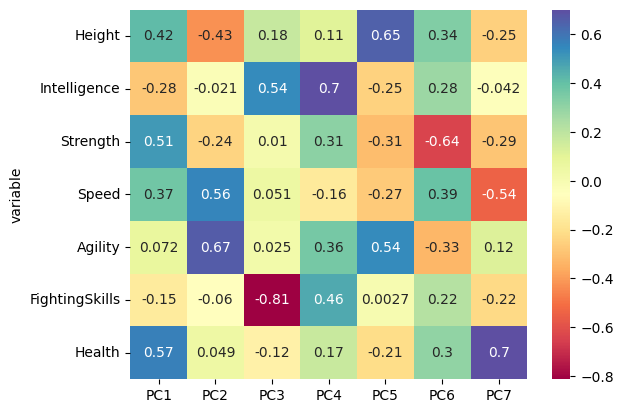

In [8]:
# standarized correlation matrix
plot_correlation_matrix_of_principal_components(pca_table_standarized)

In [9]:
# get the coefficients of the principal components
fist_pc_standarized = get_coefficients_of_principal_components(pca_table_standarized)

Coefficients of the first principal component:
 variable
Height            0.415949
Intelligence     -0.283094
Strength          0.505662
Speed             0.372581
Agility           0.071876
FightingSkills   -0.151247
Health            0.569466
Name: PC1, dtype: float64


### Comparasion

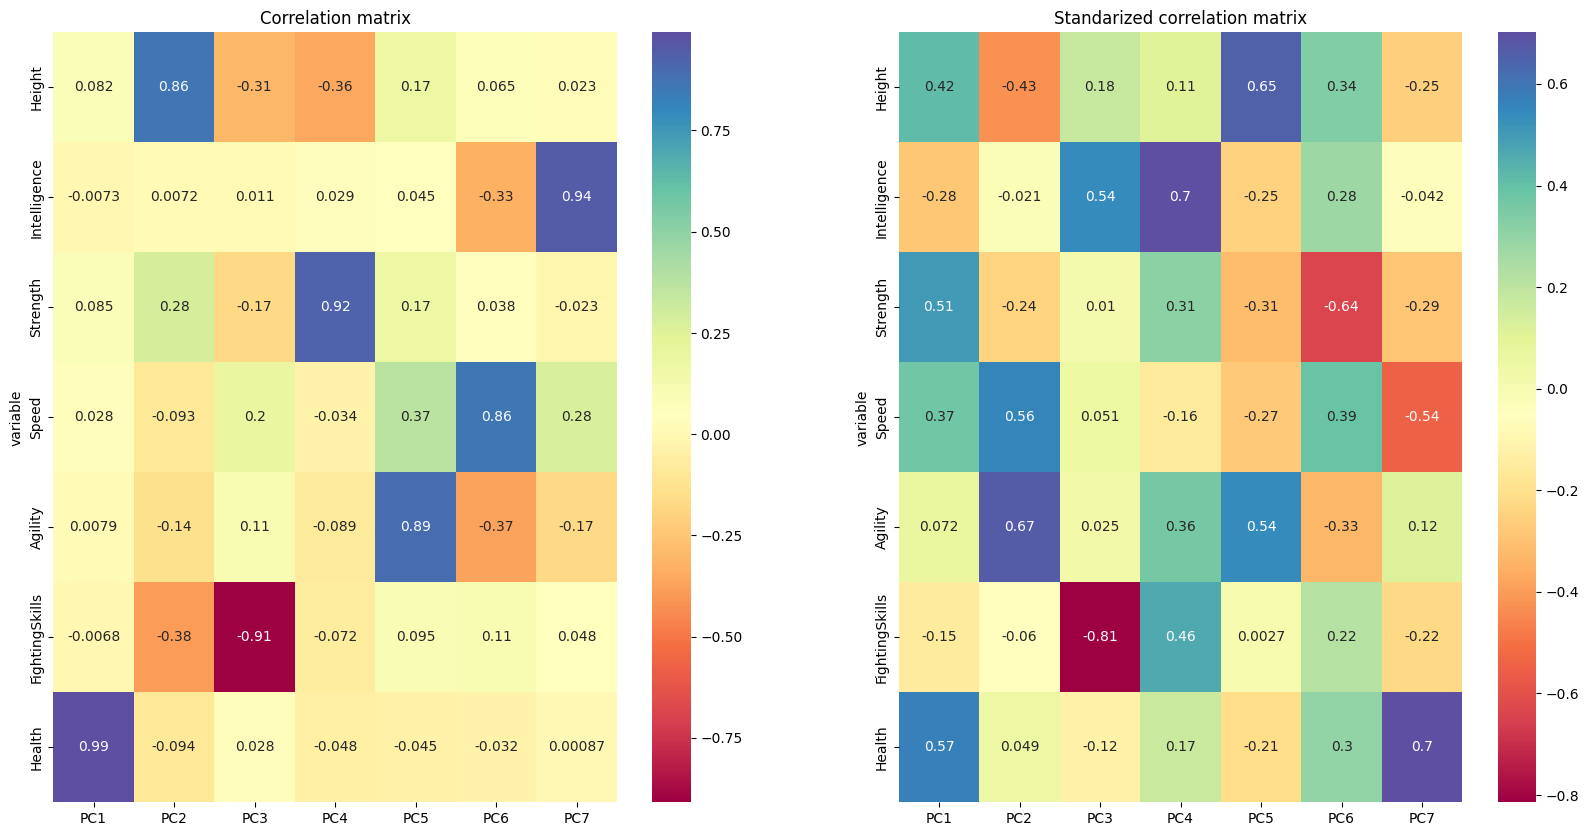

In [10]:
# Comparasion of the correlation matrixes
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix')
sns.heatmap(pca_table, annot=True, cmap='Spectral')
plt.subplot(1, 2, 2)
plt.title('Standarized correlation matrix')
sns.heatmap(pca_table_standarized, annot=True, cmap='Spectral')
plt.show()

Text(0.5, 1.0, 'Comparasion of the coefficients of the first principal component')

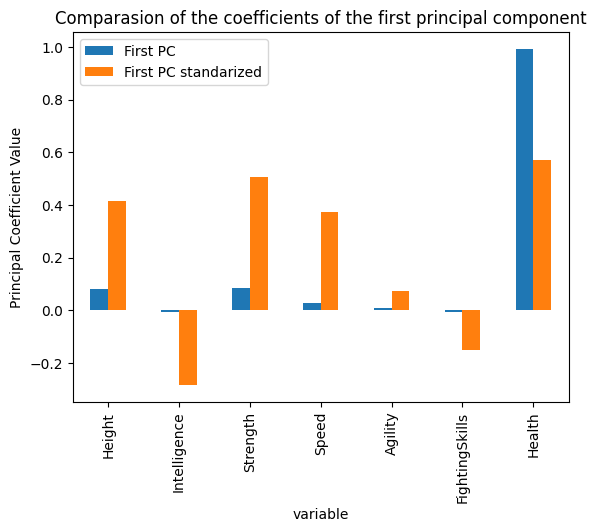

In [11]:
# Comparasion of the coefficients of the first principal component
first_pca = pca_table['PC1']
first_pca_standarized = pca_table_standarized['PC1']
pd.DataFrame({'First PC': first_pca, 'First PC standarized': first_pca_standarized}).plot(kind='bar')
plt.ylabel('Principal Coefficient Value')
plt.title('Comparasion of the coefficients of the first principal component')

## b)

In [12]:
def assess_dimensions(pca_out, variance_threshold=0.85):
    explained_variance = get_explained_variance_ratio(pca_out)
    cumulative_variance = np.cumsum(explained_variance)

    # Find the number of components needed to reach the variance threshold
    num_needed_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    return num_needed_components, cumulative_variance, explained_variance


def plot_cumulative_variance(cumulative_variance, variance_threshold, num_needed_components, title, explained_variance):

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Explained Variance per Component')
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid()
    plt.show()

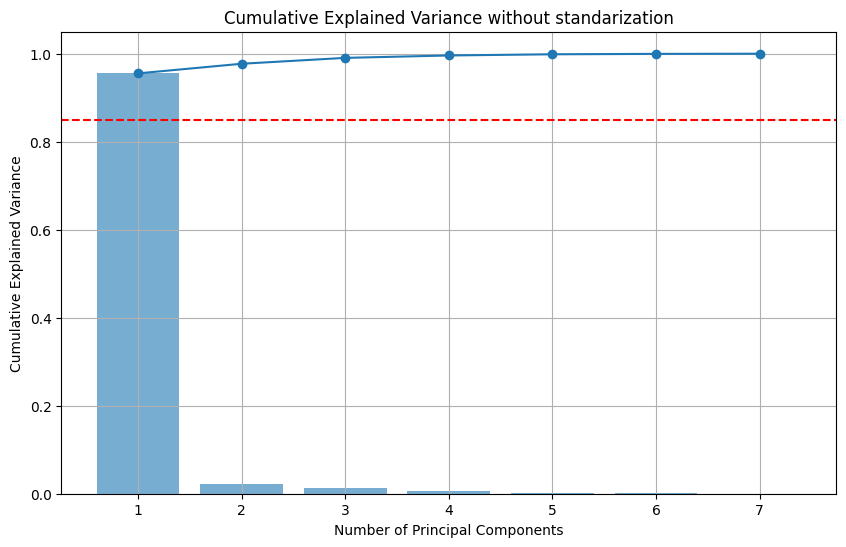

In [13]:
pca_out_b = get_pca_out(superhero_df)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(pca_out_b)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance without standarization", explained_variance)

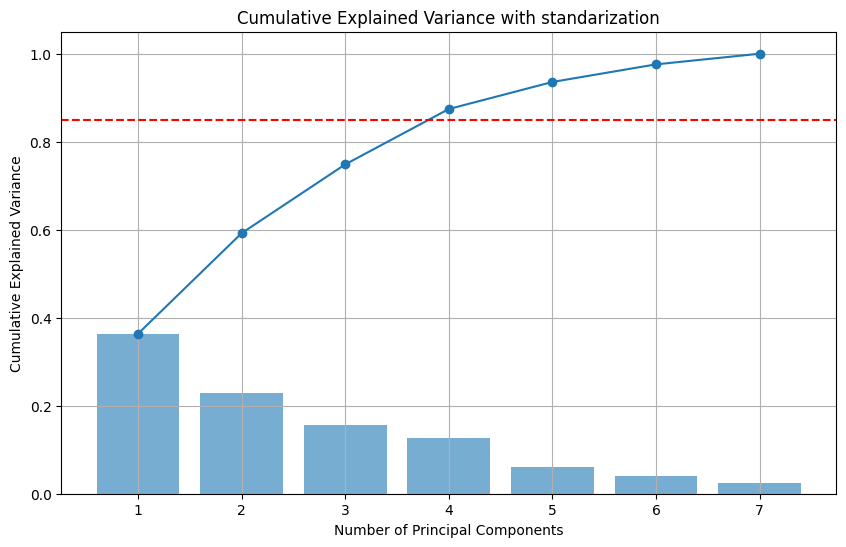

In [14]:
pca_out_b_standarized = get_pca_out(superhero_df, if_standarize=True)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(pca_out_b_standarized)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance with standarization", explained_variance)

## c)


In [112]:
def plot_pca_biplot(dataframe, colorlist=None):
    # Drop any missing values
    dataframe_cleaned = dataframe.dropna()

    # Standardize the data if specified
    data = StandardScaler().fit_transform(dataframe_cleaned)

    # Perform PCA
    pca = PCA().fit(data)

    # Extract loadings and PCA scores
    loadings = pca.components_
    pca_scores = pca.transform(data)

    # Get explained variance for the first two principal components
    var1 = round(pca.explained_variance_ratio_[0] * 100, 2)
    var2 = round(pca.explained_variance_ratio_[1] * 100, 2)

    cluster.biplot(
        cscore=pca_scores,
        loadings=loadings,
        labels=dataframe_cleaned.columns.values,
        var1=var1,
        var2=var2,
        show=True,
        dim=(10, 8),
        colorlist=colorlist
    )



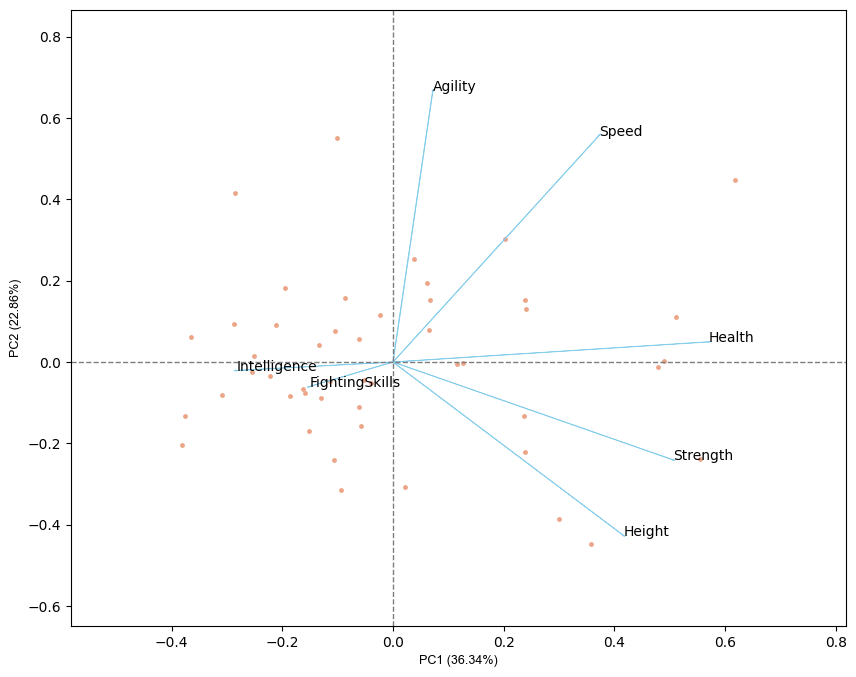

In [110]:
plot_pca_biplot(superhero_df)

Principal Component 1 (PC1):

- PC1 accounts for 36.3% of the variance in the dataset, which suggests it captures the most significant pattern or feature in the data.
- The vectors for Strength, Height, Health, and Speed point in a similar direction, which suggests these attributes are correlated and contribute significantly to PC1.
- In this context, PC1 might represent a general "Power/Physical Attribute" dimension. Characters with high values in these attributes (e.g., Strength and Health) would likely have a high score along PC1


Principal Component 2 (PC2):

- PC2 explains 22.9% of the variance, capturing an orthogonal (independent) pattern to PC1.
- The vectors for Agility and Speed are directed more toward PC2, indicating that these traits contribute more to this component.
- PC2 might represent an "Agility/Speed" dimension, highlighting attributes like agility and speed which are not necessarily linked to physical power.

# PC2 PCA for MNIST digit data

(a) Calculate the PCA. Should one normalize before?

(b) Assess the number of needed dimensions

(c) Visualize the transformed data. Can the different digits be separated?


## a)

In [17]:
# loading the Mnist dataset
minst_df = pd.read_csv('MnistN1000.csv', delimiter=',', header=None)
minst_df.head()

# print the table of principal components without standarization
pca_table = print_table_of_principal_components(minst_df)
pca_table.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
variable,,,,,,,,,,,,,,,,,,,,,
0,1.999738e-19,-7.546528e-19,7.403989e-19,1.024655e-18,3.975787e-19,-3.568892e-18,-1.603256e-18,-1.262785e-18,-6.360888e-18,-2.219429e-18,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
1,-3.469447e-17,1.387779e-17,-2.775558e-17,2.775558e-17,-6.245005e-17,5.551115e-17,-1.387779e-17,-1.387779e-17,-0.000000e+00,-5.551115e-17,...,-0.043768,-0.063800,0.049780,-0.016976,0.032038,-0.008029,0.002663,-0.048264,-0.001151,-0.008641
2,2.775558e-17,-2.220446e-16,1.110223e-16,1.110223e-16,8.326673e-17,0.000000e+00,-2.775558e-17,-1.387779e-17,1.387779e-16,7.632783e-17,...,0.036191,0.063208,-0.003358,0.005774,-0.001596,-0.002693,0.040076,0.014855,-0.007679,0.002667
3,-1.110223e-16,0.000000e+00,0.000000e+00,4.163336e-17,-1.734723e-17,-6.938894e-17,-1.387779e-17,-4.163336e-17,-5.551115e-17,-1.387779e-17,...,0.011831,-0.021359,0.009465,0.001494,-0.051063,-0.009818,0.021479,0.034789,-0.001320,-0.000061
4,0.000000e+00,-4.163336e-17,5.551115e-17,2.775558e-17,5.551115e-17,-5.551115e-17,8.326673e-17,2.602085e-17,5.551115e-17,-4.857226e-17,...,-0.032100,-0.011285,0.005269,-0.011399,0.001492,-0.015727,0.023117,-0.012852,-0.000687,-0.000875


In [18]:
# print the table of principal components with standarization
pca_table_standarized = print_table_of_principal_components(minst_df, if_standarize=True)
pca_table_standarized.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
variable,,,,,,,,,,,,,,,,,,,,,
0,-6.550027e-19,-1.120482e-18,5.614792e-19,3.741451e-19,-1.257514e-18,-3.228119e-18,-1.087969e-19,1.441376e-18,1.558563e-18,-5.003946e-19,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
1,-5.551115e-17,0.000000e+00,2.775558e-17,6.245005e-17,-5.551115e-17,0.000000e+00,5.204170e-17,0.000000e+00,-2.775558e-17,-7.285839e-17,...,-0.026031,-0.098627,-0.008335,-0.014398,-0.004181,0.017630,0.014249,-0.012011,0.030767,-0.013158
2,-0.000000e+00,1.110223e-16,-8.326673e-17,-1.387779e-17,-5.551115e-17,-5.551115e-17,-6.678685e-17,-4.163336e-17,-6.245005e-17,5.204170e-17,...,0.005123,-0.007680,0.028345,0.019904,0.005980,0.000953,0.028773,-0.012965,-0.002879,0.001411
3,1.110223e-16,-1.526557e-16,9.020562e-17,2.775558e-17,-5.551115e-17,-5.551115e-17,-6.591949e-17,-5.551115e-17,6.938894e-17,-2.775558e-17,...,0.008254,0.008172,0.057996,-0.015065,-0.009317,0.000989,-0.002266,0.002989,-0.000507,0.003656
4,5.551115e-17,-1.110223e-16,-2.775558e-17,-0.000000e+00,-5.551115e-17,2.775558e-17,-4.336809e-19,-5.724587e-17,-4.857226e-17,-2.428613e-17,...,-0.005153,-0.010846,0.052031,0.030704,-0.003699,-0.010967,0.010242,-0.011986,-0.015405,0.007719


## b)

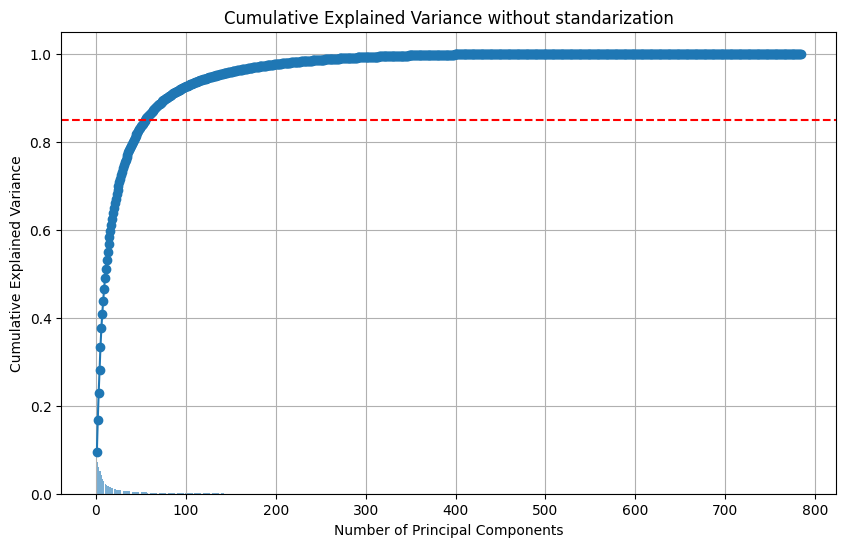

Number of components needed to reach 85% variance without standarization: 55


In [19]:
# without standarization
minset_without_standarization = get_pca_out(minst_df)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(minset_without_standarization)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance without standarization", explained_variance)
print(f"Number of components needed to reach 85% variance without standarization: {num_needed_components}")

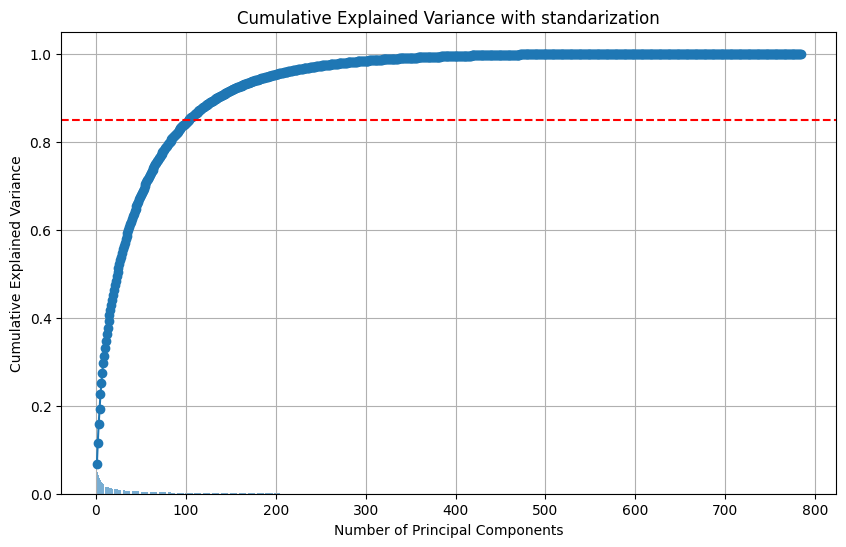

Number of components needed to reach 85% variance: 104


In [20]:
# with standarization
minset_with_standarization = get_pca_out(minst_df, if_standarize=True)
num_needed_components, cumulative_variance, explained_variance = assess_dimensions(minset_with_standarization)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance with standarization", explained_variance)
print(f"Number of components needed to reach 85% variance: {num_needed_components}")

## c)

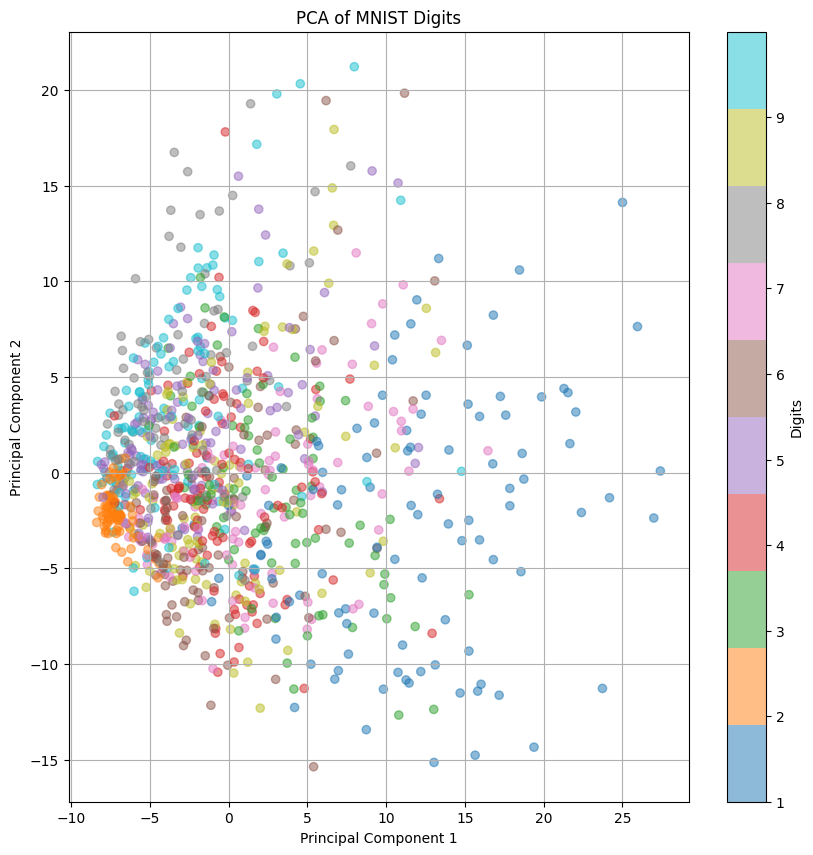

In [21]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(minst_df)
y=pd.read_csv('MnistLabels.csv', delimiter=',', header=None)

# Reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.title('PCA of MNIST Digits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10), label='Digits')
plt.grid()
plt.show()

# PC3 Movie data

(a) Load and very briefly describe the movie data (data understanding), i.e. what rows and columns do we have, what entries are there?

(b) Apply a PCA to the movie data. How many dimensions should we keep in order to not loose too much information?

(c) Show the biplot with labeled variable names and describe, what you see there. How useful is this plot? Why or why not (depending on your answer before)?

## a)

In [108]:
movieData_df = pd.read_csv('movieData.csv', delimiter=',')
movieData_df.head()

,Row,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,"""#7DaysLater"" (2013)",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
columns = movieData_df.columns
entires = {}
for column in columns:
    amount = movieData_df[column].sum()
    entires[column] = int(amount)

entries_pd = pd.DataFrame.from_dict(entires, orient='index', columns=['Amount'])
entries_pd.head(28)

,Amount
Row,0
Action,5215
Adult,10
Adventure,4306
Animation,5155
Biography,795
Comedy,13131
Crime,6605
Documentary,6363
Drama,20215


1. Column **"Row"**: This column contains the name of the movie.
2. **Another 28 columns**: These columns represent the main genres of the movie. They are encoded using one-hot encoding, where 1 indicates that the movie belongs to this genre, and 0 indicates that it does not.

## b)

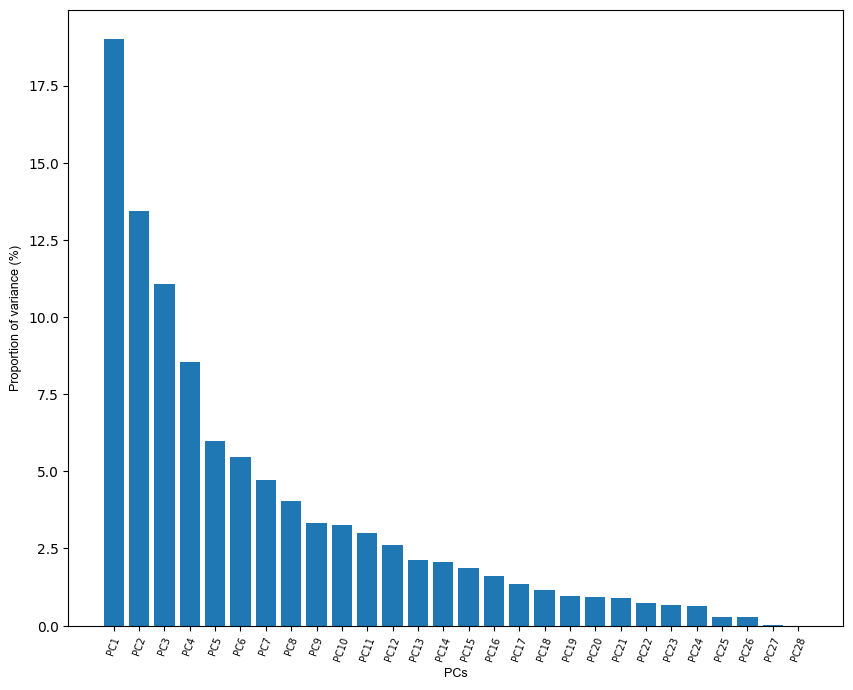

In [91]:
# Copy and clean the data
movieData_df_copy = movieData_df.copy()
movieData_df_copy.dropna(inplace=True)
filtered_df = movieData_df.loc[:, movieData_df.notna().sum() > 1]

# Perform PCA on the cleaned data
pca_out_movies = PCA().fit(filtered_df)

# Extract loadings and the number of components
loadings_movies = pca_out_movies.components_
num_pc_movies = pca_out_movies.n_components_

# Create a DataFrame for loadings
pc_list_movies = ["PC" + str(i) for i in range(1, num_pc_movies + 1)]
loadings_df_movies = pd.DataFrame(loadings_movies.T, columns=pc_list_movies, index=filtered_df.columns)

# Call cluster.screeplot, ensuring the format is compatible
cluster.screeplot(obj=[pc_list_movies, pca_out_movies.explained_variance_ratio_], show=True, dim=(10, 8))

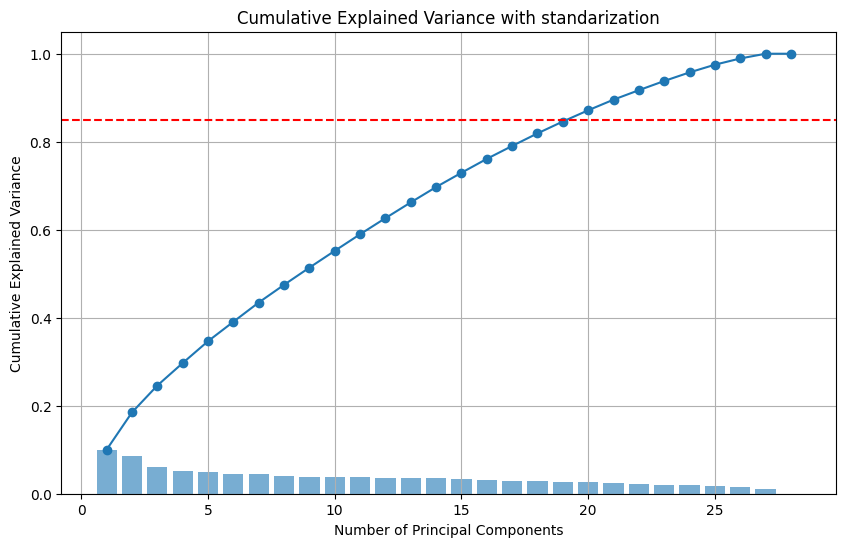

Number of components needed to reach 85% variance: 20


In [92]:
# Copy and clean the data
movieData_df_copy = movieData_df.copy()
movieData_df_copy.dropna(inplace=True)
filtered_df = movieData_df.loc[:, movieData_df.notna().sum() > 1]

movies = get_pca_out(filtered_df, if_standarize=True)

num_needed_components, cumulative_variance, explained_variance = assess_dimensions(movies)
plot_cumulative_variance(cumulative_variance, 0.85, num_needed_components, "Cumulative Explained Variance with standarization", explained_variance)
print(f"Number of components needed to reach 85% variance: {num_needed_components}")

## c)

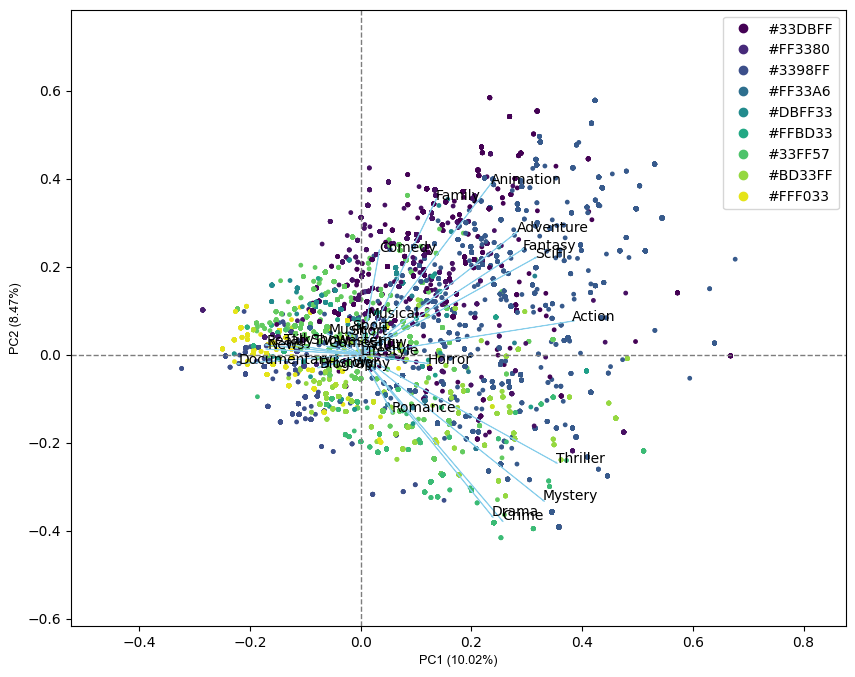

In [117]:
unique_colors = [
    '#FF5733',  # Red-Orange
    '#FFBD33',  # Yellow
    '#DBFF33',  # Yellow-Green
    '#75FF33',  # Light Green
    '#33FF57',  # Green
    '#33FFBD',  # Aqua Green
    '#33DBFF',  # Light Blue
    '#3398FF',  # Blue
    '#3357FF',  # Dark Blue
    '#5733FF',  # Violet
    '#BD33FF',  # Purple
    '#FF33DB',  # Pink
    '#FF337F',  # Light Pink
    '#FF3380',  # Salmon
    '#FF9D33',  # Coral
    '#FF33A6',  # Fuchsia
    '#FF8F33',  # Peach
    '#FFA533',  # Apricot
    '#FF5733',  # Orange
    '#B8FF33',  # Lime
    '#FFF033',  # Lemon
    '#33FF8F',  # Seafoam
    '#A1FF33',  # Mint
    '#33FFD5',  # Turquoise
    '#33A8FF',  # Sky Blue
    '#8B33FF',  # Lavender
    '#C933FF',  # Lilac
    '#FF3361',  # Hot Pink
    '#FF3D33',  # Tomato
    '#FF33A1'  # Bright Magenta
]

unique_genres = filtered_df.idxmax(axis=1)
color_mapping = {genre: unique_colors[i] for i, genre in enumerate(unique_genres.unique()) if i < len(unique_colors)}
colorlist = [color_mapping[genre] for genre in unique_genres]

plot_pca_biplot(filtered_df, colorlist=colorlist)


Biplot displays two principal components (PC1 and PC2), which summarize the most variance in the data, and it plots points representing individual movies colored by their genres. Additionally, the plot includes arrows that represent the loading of each variable (genres in this case).

**Axes Interpretation:**

PC1 (10.02%): This axis represents the first principal component, explaining 10.02% of the variance in the data.

PC2 (8.47%): This axis represents the second principal component, explaining 8.47% of the variance.

**Color Coding:**

Each point is colored according to the movie genre, allowing for quick visual identification of genre distributions across the two principal components.

**Labeled Variables:**

Arrows indicate the direction and strength of the loading for each genre. Longer arrows suggest a stronger influence on that principal component.

**Clusters and Distribution:**

Movies appear to cluster based on genre. For example, animation and family films cluster in one direction, while thrillers and horrors seem to extend in another.

**Overlap of Genres:**

Some genres are closer together, indicating that movies in these categories may have overlapping characteristics (e.g., action and adventure).


**Limited Variance Representation:** 

Since PCA only captures a portion of the total variance, important features that contribute to variance may be overlooked, particularly in higher dimensions.


**Overlapping Points:** 

With a large dataset, many movies may overlap, making it hard to discern specific individual points or clusters.